In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000895421"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000895421
SIC,6211
Description,"SECURITY BROKERS, DEALERS & FLOTATION COMPANIES"
Name,MORGAN STANLEY
Ticker,MS


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,41.0,3.293439e+01,7.062529e+00,-3.0,3.102000e+01,3.238000e+01,3.699000e+01,4.283000e+01
interest income,42.0,1.884190e+09,8.018119e+08,-30000000.0,1.404000e+09,1.745500e+09,1.963000e+09,4.290000e+09
net income,41.0,1.280951e+09,8.229424e+08,-956000000.0,7.700000e+08,1.253000e+09,1.831000e+09,2.704000e+09
net interest income,42.0,4.599286e+08,4.091114e+08,-488000000.0,1.497500e+08,4.690000e+08,8.580000e+08,1.037000e+09
total revenue,42.0,8.069595e+09,2.026161e+09,-77000000.0,7.660750e+09,8.525500e+09,9.260750e+09,1.107700e+10


# Plots

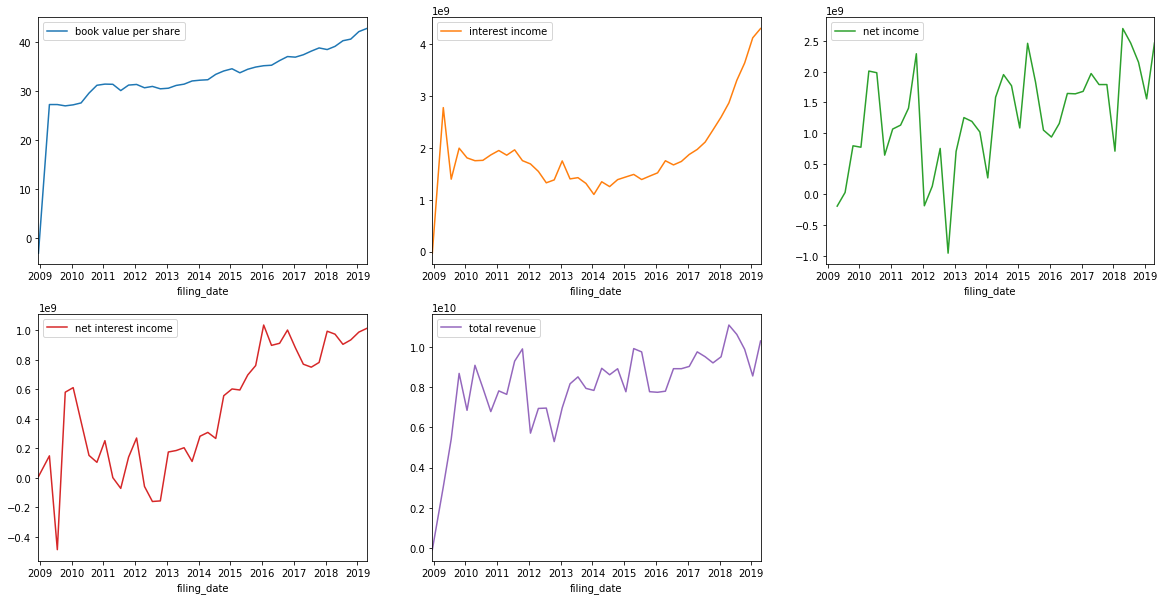

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0000895421 book value per share                            2008Q4  missing   
           book value per share                            2009Q2  missing   
           interest income                                 2008Q4  missing   
           net income                 2008Q3 to 2008Q4: 2 periods  missing   
           net interest income                             2008Q4  missing   
           provision for loan losses                         None    empty   
           total revenue                                   2008Q4  missing   

                                                 message  
cik        item                                           
0000895421 book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           provision for loan losses  No values for item  
           total revenue                  Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()